# Adaboost Classifier 
Adaboost classifier is an ensemble technique that allows you to make predictions on both qualitatitve and quantitative datatypes. The classifier uses a series of stumps to make predictions using weak learners in a dataset. This classifier is different from random forest where random forest ensembles decision trees to make predictions. 
Each observation starts out weighted the same throughout the data and gets adjusted based on false predictions using the amount of say in the model to make new standardized weighted averages with the formula(s). (False predictions weight are totaled):
1. amount of say = 1/2 log(1- Total Error/Total Error)
    - total error = total misclassified / total number of observations
2. observation weight x e ^ amount of say -----Used for the correctly predicted values 
   observation weight x e ^ -amount of say ------- Used for the incorrectly predicted values 
   
 After the stumps work through each stump testing the best results these formulas outputs will then be weighted according to the adaboost formula (2). The weights then become normalized according to the original weights set at the beginning of the classifier. This puts emphasis on the variables that were predicted incorrectly. 
 Once the model has been trained data will then be broken up according to adjacent ranges of observatuions.

In [21]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Required Packages for Modeling

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train set split
 - Used to split the data into 80% train and 20% test 
     - Training set is used to train the models predictions for the test data 
     - Test data is unpredicted data that can be fed into the model 

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Outcome'] , df['Outcome'], test_size=0.2, random_state=42)

# Ensembling
- Adaboost is an build off of decision trees 
- Here we are creating a decision tree object that will serve as our base estimator in the Adaboostclassifier 
- In this model we use 50 

In [41]:
# Create a decision tree classifier as the base estimator
decision_tree = DecisionTreeClassifier(max_depth=1, random_state=42)

# Create the Adaboost classifier with 50 estimators
adaboost_clf = AdaBoostClassifier(base_estimator=model_object, n_estimators=50, random_state=42)

# Grid Search 
    - Grid search is used to optimize the n_estimators
    - Grid search will take in the model object, param_grid which will serve to test the optimal amount of estimators in the model 

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10,50, 100, 200, 400, 800]}

# Create a grid search object to search over the parameter grid
grid_search = GridSearchCV(adaboost_clf, param_grid, cv=5)

# Fit the grid search object to the data to find the optimal hyperparameters
grid_search.fit(X_train, y_train)

# Extract the best hyperparameters
best_params = grid_search.best_params_

grid_search.best_params_['n_estimators']


50

# Fit/Predict


In [43]:
# Fit the Adaboost classifier to the training data
adaboost_clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = adaboost_clf.predict(X_test)

# Optimization 

In [44]:
from sklearn.metrics import roc_curve, auc
import numpy as np
def roc_optimization(model, X_test, y_test,X_train, y_train):
    # Fit the Adaboost classifier to the training data
    adaboost_clf.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = adaboost_clf.predict(X_test)
    import matplotlib.pyplot as plt
    # Get the predicted probabilities for the test set
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate (fpr), true positive rate (tpr) and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Subtracing the true positive rate by the false positive rate to get the optimal threshold
    j_scores = tpr - fpr
    best_threshold = thresholds[np.argmax(j_scores)]
    
    #ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')

    # Plot the optimal threshold on the ROC curve
    plt.scatter(fpr[np.argmax(j_scores)], tpr[np.argmax(j_scores)], s=50, marker='o', color='red')
    plt.text(fpr[np.argmax(j_scores)] + 0.02, tpr[np.argmax(j_scores)] - 0.03, 'Optimal threshold: %0.2f' % best_threshold)

    plt.legend(loc="lower right")
    plt.show()
    return 

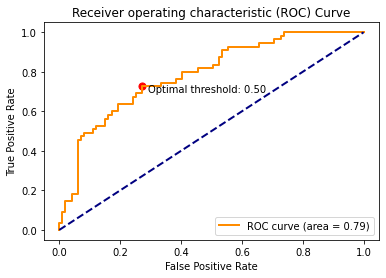

In [45]:
roc_optimization(adaboost_clf, X_test, y_test,X_train, y_train)

# Eval Metrics 

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[78, 21],
       [20, 35]])